In [86]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [87]:
%matplotlib inline

In [88]:
plt.rcParams["figure.figsize"] = (10, 5)

In [89]:
saved_style_state = matplotlib.rcParams.copy() 

In [90]:
if os.path.isfile("disney_movies_total_gross.csv"):
    filepath = "disney_movies_total_gross.csv"
    print("loading from file")
else:
    filepath = "https://data.world/kgarrett/disney-character-success-00-16/workspace/file?filename=disney_movies_total_gross.csv"
    print("loading from the internet")

disney_data = pd.read_csv(filepath)
print("done")

loading from file
done


Disney Adult Investigates Disney Money :(
By : Vince Bacani

WHAT KIND OF MOVIES MAKES DISNEY THE MOST MONEY!??11/?11?

First I will show a sample of what data we will be taking a deep dive on.

In [91]:
disney_data.sample(10)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
484,G-Force,"Jul 24, 2009",Adventure,PG,119436770,134246932
489,Toy Story 3D Double Feature,"Oct 2, 2009",Adventure,G,30702446,34509545
444,The Guardian,"Sep 29, 2006",Action,PG-13,55011732,70801353
470,Goal! 2: Living the Dream...,"Aug 29, 2008",Drama,PG-13,225067,264247
132,The Mighty Ducks,"Oct 2, 1992",Comedy,PG,50752337,103120810
217,The Big Green,"Sep 29, 1995",Comedy,PG,17736619,34372339
192,The Santa Clause,"Nov 11, 1994",Comedy,PG,144833357,298369717
455,The Hoax,"Apr 6, 2007",Drama,R,7164995,8779196
418,A Lot Like Love,"Apr 22, 2005",Comedy,PG-13,21835784,28716947
377,Shanghai Knights,"Feb 7, 2003",Adventure,PG-13,60470220,84537962


The data I have chosen has a total of 579 rows and 6 columns

Knowing a company like Disney. Whatever makes the most money, they will continue to do pump out similar movies.

Text(0.5, 1.0, 'Types of Genres')

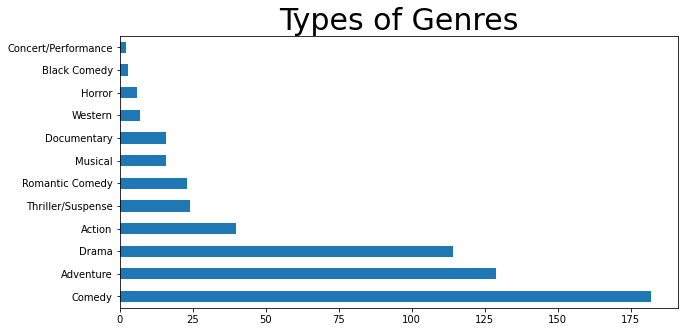

In [92]:
gcount = disney_data.genre.value_counts()
gcount.plot(kind="barh")
plt.title("Types of Genres", fontsize = 30)

As you can see. Comedies are the films that are produced most often. So we can assume that this is what movies are what make Disney the most amount of money. Now much like you probably are thinking, "This cut the investigation short"

In [93]:
sortgross = disney_data.sort_values(by=['total_gross'], ascending=False)
sortgross.head(10)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",Adventure,PG-13,936662225,936662225
524,The Avengers,"May 4, 2012",Action,PG-13,623279547,660081224
578,Rogue One: A Star Wars Story,"Dec 16, 2016",Adventure,PG-13,529483936,529483936
571,Finding Dory,"Jun 17, 2016",Adventure,PG,486295561,486295561
558,Avengers: Age of Ultron,"May 1, 2015",Action,PG-13,459005868,459005868
441,Pirates of the Caribbean: Dead Man’…,"Jul 7, 2006",Adventure,PG-13,423315812,544817142
179,The Lion King,"Jun 15, 1994",Adventure,G,422780140,761640898
499,Toy Story 3,"Jun 18, 2010",Adventure,G,415004880,443408255
532,Iron Man 3,"May 3, 2013",Action,PG-13,408992272,424084233
569,Captain America: Civil War,"May 6, 2016",Action,PG-13,408084349,408084349


Text(0.5, 1.0, 'Top 5 Genres')

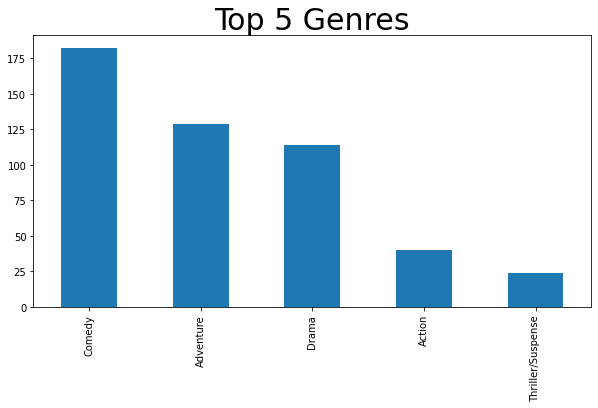

In [94]:
genre_top5 = disney_data['genre'].value_counts()
genre_top5[genre_top5 > 23].plot(kind='bar')
plt.title("Top 5 Genres", fontsize = 30)

From looking at this modified bar chart we can better visualise and directly constrast the amount of the top genres. And we can see that the runner up is adventure, which makes sense when sorted. But action doesnt as its fourth and barely passes 25 movies. Which brings me to ask.

WHERE DID ALL OF THE COMEDY FILMS GO?!?

I decided to go about this by looking if there were any visible differences with the other columns.

I first compared the mpaa ratings of both genres.

In [95]:
disney_data.groupby(["genre", "MPAA_rating"]).size()

genre                MPAA_rating
Action               PG              5
                     PG-13          19
                     R              12
Adventure            G              42
                     PG             57
                     PG-13          17
                     R               3
Black Comedy         R               3
Comedy               G              17
                     Not Rated       1
                     PG             77
                     PG-13          37
                     R              30
Concert/Performance  G               2
Documentary          G              10
                     Not Rated       1
                     PG              5
Drama                G               5
                     PG             28
                     PG-13          37
                     R              33
Horror               PG-13           1
                     R               4
Musical              G               9
                     Not Rated 

When waking into account the different amounts of films per genre and taking the percentage, we immediately see a drastic difference between the two with the highest rating of comedy is 77.58% pg and action's highest as 57.78% pg-13. Which I gathered an opinion as to why action could have been in the top 10 and not comedy as there is a higher rewatchability with an older audience as opposed to a younger.

Although this was interesting, the most interesting was the comparison of the growth of the genre over time.

In [96]:
comonly = disney_data.loc[disney_data["genre"] == 'Comedy']

comonly.tail(15)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
466,College Road Trip,"Mar 7, 2008",Comedy,G,45610425,53550960
469,Swing Vote,"Aug 1, 2008",Comedy,PG-13,16289867,19125841
472,Beverly Hills Chihuahua,"Oct 3, 2008",Comedy,PG,94514402,110932022
475,Bolt,"Nov 21, 2008",Comedy,PG,114053759,133702498
476,Bedtime Stories,"Dec 25, 2008",Comedy,PG,110101975,128039679
492,Old Dogs,"Nov 25, 2009",Comedy,PG,49492060,55503929
503,You Again,"Sep 24, 2010",Comedy,PG,25702053,27461121
507,Gnomeo and Juliet,"Feb 11, 2011",Comedy,G,99967670,106270797
512,Prom,"Apr 29, 2011",Comedy,PG,10130219,10768946
519,The Muppets,"Nov 23, 2011",Comedy,PG,88625922,94189503


As you can see when isolating only the comedy films, Movies are produced at a steady rate of 1-3 every year until suddenly not being made anymore after 2014. However what caught my eye was the gross of these films. If you look at Bolt and bedtime stories, they have acquired a gross of over 1 hundred million and movies after 2008 dont get close.

In [97]:
actiononly = disney_data.loc[disney_data["genre"] == 'Action']

actiononly.tail(15)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
343,Pearl Harbor,"May 25, 2001",Action,PG-13,198539855,295705112
359,Reign of Fire,"Feb 19, 2002",Action,PG-13,43061982,62480631
364,Bad Company,"Jun 7, 2002",Action,PG-13,30157016,43756218
410,Ladder 49,"Oct 1, 2004",Action,PG-13,74541707,101161045
444,The Guardian,"Sep 29, 2006",Action,PG-13,55011732,70801353
488,Surrogates,"Sep 25, 2009",Action,PG-13,38577772,43361416
498,Prince of Persia: Sands of Time,"May 28, 2010",Action,PG-13,90759676,96971361
518,Real Steel,"Oct 7, 2011",Action,PG-13,85463309,90848019
524,The Avengers,"May 4, 2012",Action,PG-13,623279547,660081224
532,Iron Man 3,"May 3, 2013",Action,PG-13,408992272,424084233


What I found interesting and to be honest, mind blowing, was that the opposite could be said about Action films as after 2008 we see a steady incline from 90 million to soon hundreds of millions consistently. 

This was fascinating to me as These dates directly coincide with the infamous Disney acquisition of Marvel on December 31, 2009 as said in wikipedia. 

![](img/Disney Acquisition of marvel.png)

Even more mind blowing to find out was that this also coincides with dates for what is known in the DIsney Fandom as the 'Revival Era' which was (arguably) kickstarted with the 2008 film Bolt, the first of the two comedy films i previously stated to have a gross of over 100 million

(![](file:///c%3A/Users/bacanival/1161/data_project/img/d23%20revival%20era%20poster.jpg))

In [98]:
sortgross = disney_data.sort_values(by=['total_gross'], ascending=False)
sortgross.head(10)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",Adventure,PG-13,936662225,936662225
524,The Avengers,"May 4, 2012",Action,PG-13,623279547,660081224
578,Rogue One: A Star Wars Story,"Dec 16, 2016",Adventure,PG-13,529483936,529483936
571,Finding Dory,"Jun 17, 2016",Adventure,PG,486295561,486295561
558,Avengers: Age of Ultron,"May 1, 2015",Action,PG-13,459005868,459005868
441,Pirates of the Caribbean: Dead Man’…,"Jul 7, 2006",Adventure,PG-13,423315812,544817142
179,The Lion King,"Jun 15, 1994",Adventure,G,422780140,761640898
499,Toy Story 3,"Jun 18, 2010",Adventure,G,415004880,443408255
532,Iron Man 3,"May 3, 2013",Action,PG-13,408992272,424084233
569,Captain America: Civil War,"May 6, 2016",Action,PG-13,408084349,408084349


With this knowledge its a no brainer as to why action appears in the top ten gross as opposed to comedy as the MCU has taken off in popularity with all ages.

CONCLUSION